In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from six import StringIO

In [2]:
## Loading the dataset
attrition_data=pd.read_csv('Capstone Project/HR_Employee_Attrition_Data.csv')
attrition_data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [3]:
attrition_data.shape

(2940, 35)

In [4]:
total = attrition_data.isnull().sum().sort_values(ascending=False)
percent = (attrition_data.isnull().sum()/attrition_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
YearsWithCurrManager,0,0.0
EmployeeCount,0,0.0
JobLevel,0,0.0
JobInvolvement,0,0.0
HourlyRate,0,0.0
Gender,0,0.0
EnvironmentSatisfaction,0,0.0
EmployeeNumber,0,0.0
EducationField,0,0.0
JobSatisfaction,0,0.0


In [5]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [5]:
attrition_data=attrition_data.drop(['EmployeeNumber'],axis=1)

In [6]:
attrition_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,1.092896,20.325969,0.711440,1.106752,1.102658,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Create Target Feature

In [8]:
attrition_data['target']=np.where(attrition_data['Attrition']=="Yes",1,0)
attrition_data=attrition_data.drop(['Attrition'],axis=1)

# Defining Target and Independent Features

In [9]:
Y=attrition_data[['target']]
X=attrition_data.drop(['target'],axis=1)

# Splitting into Categorical and Numerical

In [10]:
num=X.select_dtypes(include='number')
char=Y.select_dtypes(include='object')

In [11]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x : unique_levels(x)))

In [12]:
df_value_counts.columns=['feature_levels']
df_value_counts.head()

,feature_levels
Age,43
DailyRate,886
DistanceFromHome,29
Education,5
EmployeeCount,1


In [13]:
slice1=df_value_counts.loc[df_value_counts['feature_levels']<=20]
cat_list=slice1.index
cat=num.loc[:,cat_list]
cat.dtypes

Education                   int64
EmployeeCount               int64
EnvironmentSatisfaction     int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [15]:
slice2=df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list=slice2.index
num=num.loc[:,num_list]
num.dtypes

Age                  int64
DailyRate            int64
DistanceFromHome     int64
HourlyRate           int64
MonthlyIncome        int64
MonthlyRate          int64
TotalWorkingYears    int64
YearsAtCompany       int64
dtype: object

In [16]:
char=pd.concat([char,cat],axis=1,join="inner")
char.head()

,Education,EmployeeCount,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,1,2,3,2,4,8,11,3,1,80,0,0,1,4,0,5
1,1,1,3,2,2,2,1,23,4,4,80,1,3,3,7,1,7
2,2,1,4,2,1,3,6,15,3,2,80,0,3,3,0,0,0
3,4,1,4,3,1,3,1,11,3,3,80,0,3,3,7,3,0
4,1,1,1,3,1,2,9,12,3,4,80,1,3,3,2,2,2


# Detection of Outliers

In [18]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [19]:
num=num.apply(lambda x : outlier_cap(x))

In [21]:
num.describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.921871,802.482993,9.192517,65.891156,6503.306156,14312.605544,11.268707,6.980272
std,9.104845,403.191626,8.105485,20.325969,4699.853209,7110.879597,7.709195,6.003879
min,19.000000,117.000000,1.000000,30.000000,1372.260000,2324.170000,1.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8045.000000,6.000000,3.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,10.000000,5.000000
75%,43.000000,1157.000000,14.000000,84.000000,8380.000000,20462.000000,15.000000,9.000000
max,58.610000,1485.000000,29.000000,100.000000,19626.610000,26705.440000,35.000000,31.000000


In [35]:
X=pd.concat([num,char],axis=1)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size =0.2)

In [41]:
# Decision tree with depth = 2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2)
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.8507653061224489
Testing score:  0.8316326530612245


In [42]:
# Decision tree with depth = 8
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=8)
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.9260204081632653
Testing score:  0.8775510204081632


In [43]:
# Decision tree with depth = 5
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=5)
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.8741496598639455
Testing score:  0.8435374149659864


In [44]:
# Decision tree with depth = 9
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=9)
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.9485544217687075
Testing score:  0.8826530612244898


In [45]:
#Decision tree

model_dt = DecisionTreeClassifier(max_depth = 8, criterion ="entropy")
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt.predict_proba(x_test)[:, 1]

In [46]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [1]:
# predictions = model_dt.predict(x_test)

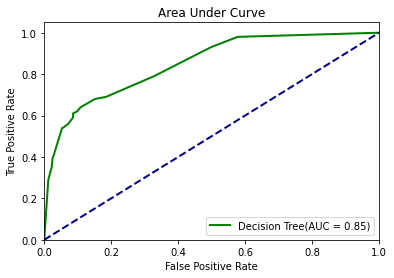

In [47]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [48]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

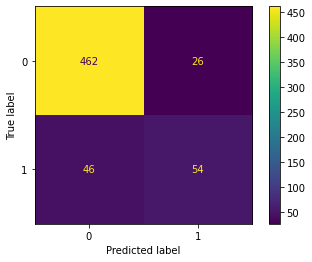

In [49]:
metrics.plot_confusion_matrix(model_dt,x_test,y_test)

In [52]:
accuracy_score(y_test, predictions)

0.8775510204081632

# Random Forest

In [15]:
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen
from sklearn import preprocessing
import pandas as pd

In [91]:
## Loading the dataset
attrition_data=pd.read_csv('Capstone Project/HR_Employee_Attrition_Data.csv')
names=['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

In [92]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [93]:
names_index = names

In [94]:
attrition_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [17]:
model_data=attrition_data

In [18]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['Over18'] = le.fit_transform(res_df['Over18'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    return res_df

In [19]:
encoded_df = preprocessor(model_data)

In [20]:
feature_space = encoded_df.iloc[:, encoded_df.columns != 'Attrition']
feature_class = encoded_df.iloc[:, encoded_df.columns == 'Attrition']


training_set, test_set, class_set, test_class_set = train_test_split(feature_space,
                                                                    feature_class,
                                                                    test_size = 0.20, 
                                                                    random_state =101)

In [21]:
# Cleaning test sets to avoid future warning messages
class_set = class_set.values.ravel() 
test_class_set = test_class_set.values.ravel()

In [22]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

In [23]:
param_dist = {'max_depth': [2,3,4,5,6,7,8],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2'],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 1)

cv_rf.fit(training_set, class_set)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}


In [34]:
## Set best parameters given by grid search 
fit_rf.set_params(criterion='gini',max_depth=8,max_features='auto')

RandomForestClassifier(max_depth=8, n_estimators=15, oob_score=True,
                       random_state=42, warm_start=True)

# OOB Rate

In [48]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(training_set, class_set)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [49]:
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

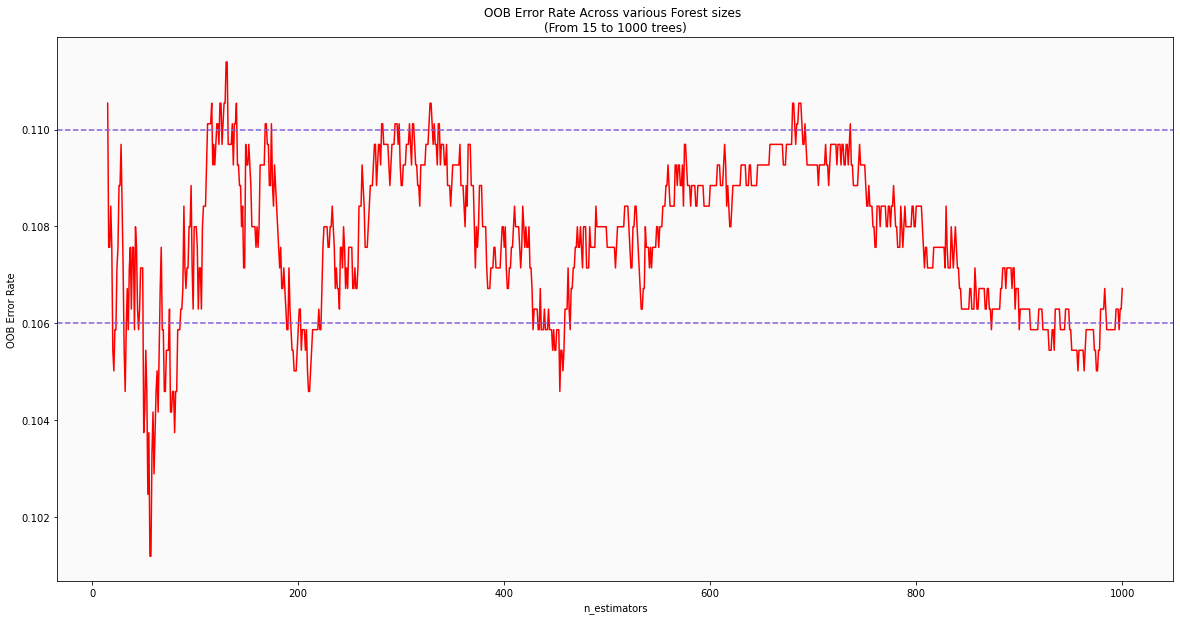

In [50]:
fig, ax = plt.subplots(figsize=(20,10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.110 ,color='#875FDB',linestyle='--')
plt.axhline(0.106, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [51]:
print('OOB Error rate for 700 trees is: {0:.5f}'.format(oob_series[450]))

OOB Error rate for 700 trees is: 0.10544


In [52]:
fit_rf.set_params(n_estimators=500,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=8, n_estimators=500, random_state=42)

In [53]:
fit_rf.fit(training_set, class_set)

RandomForestClassifier(max_depth=8, n_estimators=500, random_state=42)

In [54]:
def variable_importance(fit):
    try:
        if not hasattr(fit,'fit'):
            return("'{0}'is not an instantiated model from scikit-learn".format(fit))
        if not vars(fit)['estimators_']:
            return print('Model doesnt appear to be trained')
    except KeyError:
        print('Model entered does not contain estimators_attribute')
        
    importances=fit.feature_importances_
    indices=np.argsort(importances)[::-1]
    return {'importance':importances,'index':indices}
        

In [55]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [95]:
def print_var_importance(importance,indices,names_index):
    print('Feature Ranking:')
    
    for f in range(0,indices.shape[0]):
        i=f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

In [96]:
print_var_importance(importances_rf, indices_rf,names_index)

Feature Ranking:
1. The feature 'Over18' has a Mean Decrease in Impurity of 0.07683
2. The feature 'MaritalStatus' has a Mean Decrease in Impurity of 0.07649
3. The feature 'StockOptionLevel' has a Mean Decrease in Impurity of 0.06839
4. The feature 'Age' has a Mean Decrease in Impurity of 0.06120
5. The feature 'BusinessTravel' has a Mean Decrease in Impurity of 0.04695
6. The feature 'WorkLifeBalance' has a Mean Decrease in Impurity of 0.04637
7. The feature 'Gender' has a Mean Decrease in Impurity of 0.04404
8. The feature 'MonthlyIncome' has a Mean Decrease in Impurity of 0.04250
9. The feature 'Department' has a Mean Decrease in Impurity of 0.04104
10. The feature 'StandardHours' has a Mean Decrease in Impurity of 0.03323
11. The feature 'YearsSinceLastPromotion' has a Mean Decrease in Impurity of 0.03264
12. The feature 'JobLevel' has a Mean Decrease in Impurity of 0.03132
13. The feature 'MonthlyRate' has a Mean Decrease in Impurity of 0.03118
14. The feature 'JobInvolvement' ha

In [107]:
predictions_rf = fit_rf.predict(test_set)

In [108]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

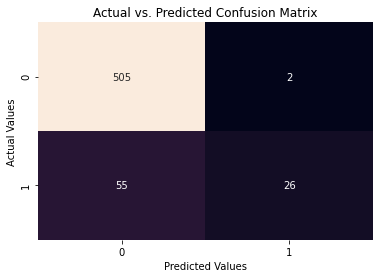

In [109]:
conf_mat = create_conf_mat(test_class_set, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [110]:
accuracy_rf = fit_rf.score(test_set, test_class_set)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.903


In [113]:
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .3f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.097
